# 프로그래밍 언어별 출판 책
## 프로그래밍 순위(검색어 설정)
```
- 1위 : 파이썬 / Python                 7위 : JavaScript / 자바스크립트
- 2위 : C언어 / 프로그래밍 C            8위 : SQL
- 3위 : 자바 / Java                     9위 : PHP / PHP 프로그래밍
- 4위 : C++                            추가 -  14위 : R / R프로그래밍
- 5위 : C# / C# 프로그래밍              
- 6위 : Visual Basic
```

## 1. 프로그래밍 언어 별 책 데이터 수집

네이버 API 사용시 최대 출력이 1000개까지이다. 

- 요청변수를 설정해 한국출판사에서 출판된 책을 꺼내기 위해 상세검색을 이용
- d_titl 과 d_catg를 사용하여 크롤링 진행
    - d_titl : 검색어
    - d_catg : it/컴퓨터 (카테고리 번호 280)으로 고정

In [25]:
import os
import sys
import urllib.request
#id와 비밀번호는 개인적
client_id = ""
client_secret = ""

In [69]:
def gen_search_url(api_node,search_text,category,start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?d_titl=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    cate = "&d_catg=" + str(category)

    return base + node + param_query + cate + param_start + param_disp

In [70]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

In [71]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str 

In [72]:
import pandas as pd 

def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    author = [each["author"] for each in json_data["items"]]
    price = [each["price"] for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    publisher = [each["publisher"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        "title": title, 
        "author": author, 
        "price": price,
        "pubdate" : pubdate, 
        "publisher": publisher,
        "isbn"   : isbn
    }, columns=["title", "author", "price","pubdate", "publisher","isbn"])
    return result_pd

In [73]:
python_kor_book = [] 

for n in range(1, 1000, 100):
    url = gen_search_url("book_adv","파이썬",280,n,100)
    json_result = get_result_onpage(url)
    pd_result = get_fields(json_result)
    
    python_kor_book.append(pd_result)

python_kor_book = pd.concat(python_kor_book)

[2021-10-20 20:15:44.031663] Url Request Success
[2021-10-20 20:15:44.369734] Url Request Success
[2021-10-20 20:15:44.701352] Url Request Success
[2021-10-20 20:15:45.030088] Url Request Success
[2021-10-20 20:15:45.341301] Url Request Success
[2021-10-20 20:15:45.667918] Url Request Success
[2021-10-20 20:15:45.934867] Url Request Success
[2021-10-20 20:15:46.029889] Url Request Success
[2021-10-20 20:15:46.111613] Url Request Success
[2021-10-20 20:15:46.195837] Url Request Success


In [75]:
import time

In [76]:
words = ["Python","파이썬","C언어","C프로그래밍","Java", "자바", "C++"]

for word in words:
    if word == "Python":
        python_eng_book = [] 
        for n in range(1, 1000, 100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            pd_result = get_fields(json_result)
            python_eng_book.append(pd_result)
            time.sleep(2)
        python_eng_book = pd.concat(python_eng_book)
        python_eng_book.reset_index(drop=True, inplace=True)
        python_eng_book["price"] = python_eng_book["price"].astype("float")
        print(word + "끝")


    elif word == "파이썬":
        python_kor_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv", word, 280, n, 100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            python_kor_book.append(pd_result)
            time.sleep(2)
        python_kor_book = pd.concat(python_kor_book)
        python_kor_book.reset_index(drop=True, inplace=True)
        python_kor_book["price"] = python_kor_book["price"].astype("float")
        print(word + "끝")

    elif word == "C언어":
        C_kor_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv", word, 280, n, 100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            C_kor_book.append(pd_result)
            time.sleep(2)
        C_kor_book = pd.concat(C_kor_book)
        C_kor_book.reset_index(drop=True, inplace=True)
        C_kor_book["price"] = C_kor_book["price"].astype("float")
        print(word + "끝")
    
    elif word == "C프로그래밍":
        C_pro_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv", word, 280, n, 100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            C_pro_book.append(pd_result)
            time.sleep(2)
        C_pro_book = pd.concat(C_pro_book)
        C_pro_book.reset_index(drop=True, inplace=True)
        C_pro_book["price"] = C_pro_book["price"].astype("float")
        print(word + "끝")
    
    elif word == "Java":
        Java_eng_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv", word, 280, n, 100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            Java_eng_book.append(pd_result)
            time.sleep(2)
        Java_eng_book = pd.concat(Java_eng_book)
        Java_eng_book.reset_index(drop=True, inplace=True)
        Java_eng_book["price"] = Java_eng_book["price"].astype("float")
        print(word + "끝")

    elif word == "자바":
        Java_kor_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            Java_kor_book.append(pd_result)
            time.sleep(2)
        Java_kor_book = pd.concat(Java_kor_book)
        Java_kor_book[Java_kor_book["price"] ==""] = 0
        Java_kor_book.reset_index(drop=True, inplace=True)
        Java_kor_book["price"] = Java_kor_book["price"].astype("float")
        print(word + "끝")

    elif word == "C++":
        Cpp_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            Cpp_book.append(pd_result)
            time.sleep(2)
        Cpp_book = pd.concat(Cpp_book)
        Cpp_book[Cpp_book["price"] ==""] = 0
        Cpp_book.reset_index(drop=True, inplace=True)
        Cpp_book["price"] = Cpp_book["price"].astype("float")
        print(word +"끝")
       

[2021-10-20 20:15:57.500505] Url Request Success
[2021-10-20 20:15:59.844758] Url Request Success
[2021-10-20 20:16:01.919841] Url Request Success
[2021-10-20 20:16:04.009834] Url Request Success
[2021-10-20 20:16:06.117118] Url Request Success
[2021-10-20 20:16:08.218277] Url Request Success
[2021-10-20 20:16:10.284285] Url Request Success
[2021-10-20 20:16:12.369264] Url Request Success
[2021-10-20 20:16:14.489620] Url Request Success
[2021-10-20 20:16:16.579961] Url Request Success
Python끝
[2021-10-20 20:16:18.958103] Url Request Success
파이썬총 670권
[2021-10-20 20:16:21.305486] Url Request Success
파이썬총 670권
[2021-10-20 20:16:23.635307] Url Request Success
파이썬총 670권
[2021-10-20 20:16:25.969325] Url Request Success
파이썬총 670권
[2021-10-20 20:16:28.273821] Url Request Success
파이썬총 670권
[2021-10-20 20:16:30.599617] Url Request Success
파이썬총 670권
[2021-10-20 20:16:32.829085] Url Request Success
파이썬총 670권
[2021-10-20 20:16:34.910275] Url Request Success
파이썬총 0권
[2021-10-20 20:16:37.000708] Url

In [77]:
words = ["C#프로그래밍","C#","VisualBasic","JavaScript","자바스크립트","SQL","PHP","R"]

for word in words:
    if word == "C#프로그래밍":
        Cshop_pro_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            Cshop_pro_book.append(pd_result)
            time.sleep(2)
        Cshop_pro_book = pd.concat(Cshop_pro_book)
        Cshop_pro_book[Cshop_pro_book["price"] ==""] = 0
        Cshop_pro_book.reset_index(drop=True, inplace=True)
        Cshop_pro_book["price"] = Cshop_pro_book["price"].astype("float")
        print(word + "끝")
    
    elif word == "C#":
        Cshop_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            Cshop_book.append(pd_result)
            time.sleep(2)
        Cshop_book = pd.concat(Cshop_book)
        Cshop_book[Cshop_book["price"] ==""] = 0
        Cshop_book.reset_index(drop=True, inplace=True)
        Cshop_book["price"] = Cshop_book["price"].astype("float")
        print(word + "끝")


    elif word == "VisualBasic":
        VB_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            VB_book.append(pd_result)
            time.sleep(2)
        VB_book = pd.concat(VB_book)
        VB_book[VB_book["price"] ==""] = 0
        VB_book.reset_index(drop=True, inplace=True)
        VB_book["price"] = VB_book["price"].astype("float")
        print(word +"끝")
    
    elif word == "JavaScript":
        JavaS_eng_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            JavaS_eng_book.append(pd_result)
            time.sleep(2)
        JavaS_eng_book = pd.concat(JavaS_eng_book)
        JavaS_eng_book[JavaS_eng_book["price"] ==""] = 0
        JavaS_eng_book.reset_index(drop=True, inplace=True)
        JavaS_eng_book["price"] = JavaS_eng_book["price"].astype("float")
        print(word + "끝")

    elif word == "자바스크립트":
        JavaS_kor_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            JavaS_kor_book.append(pd_result)
            time.sleep(2)
        JavaS_kor_book = pd.concat(JavaS_kor_book)
        JavaS_kor_book[JavaS_kor_book["price"] ==""] = 0
        JavaS_kor_book.reset_index(drop=True, inplace=True)
        JavaS_kor_book["price"] = JavaS_kor_book["price"].astype("float")
        print(word + "끝")

    elif word == "SQL":
        sql_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            sql_book.append(pd_result)
            time.sleep(2)
        sql_book = pd.concat(sql_book)
        sql_book[sql_book["price"] ==""] = 0
        sql_book.reset_index(drop=True, inplace=True)
        sql_book["price"] = sql_book["price"].astype("float")
        print(word + "끝")

    elif word == "PHP":
        php_pro_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            php_pro_book.append(pd_result)
            time.sleep(2)
        php_pro_book = pd.concat(php_pro_book)
        php_pro_book[php_pro_book["price"] ==""] = 0
        php_pro_book.reset_index(drop=True, inplace=True)
        php_pro_book["price"] = php_pro_book["price"].astype("float")
        print(word + "끝")
    
    elif word == "R":
        R_pro_book = []
        for n in range(1,1000,100):
            url = gen_search_url("book_adv",word,280,n,100)
            json_result = get_result_onpage(url)
            print(word + "총 " + str(json_result["total"]) + "권")
            pd_result = get_fields(json_result)
            R_pro_book.append(pd_result)
            time.sleep(2)
        R_pro_book = pd.concat(R_pro_book)
        R_pro_book[R_pro_book["price"] ==""] = 0
        R_pro_book.reset_index(drop=True, inplace=True)
        R_pro_book["price"] = R_pro_book["price"].astype("float")
        print(word + "끝")

[2021-10-20 20:18:35.461959] Url Request Success
C#프로그래밍총 93권
[2021-10-20 20:18:37.576461] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:39.675301] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:41.799204] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:43.881253] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:45.968385] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:48.051849] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:50.130331] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:52.221088] Url Request Success
C#프로그래밍총 0권
[2021-10-20 20:18:54.310460] Url Request Success
C#프로그래밍총 0권
C#프로그래밍끝
[2021-10-20 20:18:56.659595] Url Request Success
C#총 304권
[2021-10-20 20:18:58.958245] Url Request Success
C#총 304권
[2021-10-20 20:19:01.258817] Url Request Success
C#총 304권
[2021-10-20 20:19:03.366231] Url Request Success
C#총 304권
[2021-10-20 20:19:05.450399] Url Request Success
C#총 0권
[2021-10-20 20:19:07.531301] Url Request Success
C#총 0권
[2021-10-20 20:19:09.610276] Url Req

In [78]:
Python = pd.concat([python_kor_book,python_eng_book])
Python.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/1.Python.xlsx", engine="xlsxwriter")
Python.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [79]:
CLang = pd.concat([C_kor_book,C_pro_book])
CLang.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/2.CLang.xlsx", engine="xlsxwriter")
CLang.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [80]:
Java = pd.concat([Java_eng_book,Java_kor_book])
Java.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/3.Java.xlsx", engine="xlsxwriter")
Java.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [81]:
Cpp_book.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/4.C++.xlsx", engine="xlsxwriter")
Cpp_book.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [82]:
Cshop = pd.concat([C_pro_book,Cshop_book])
Cshop.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/5.C#.xlsx", engine="xlsxwriter")
Cshop.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [83]:
VB_book.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/6.VisualBasic.xlsx", engine="xlsxwriter")
VB_book.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [84]:
JavaS = pd.concat([JavaS_eng_book,Java_kor_book])
JavaS.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/7.JavaScript.xlsx", engine="xlsxwriter")
JavaS.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [85]:
sql_book.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/8.SQL.xlsx", engine="xlsxwriter")
sql_book.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [86]:
php_pro_book.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/9.PHP.xlsx", engine="xlsxwriter")
php_pro_book.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

In [87]:
R_pro_book.reset_index(drop=True, inplace=True)

writer = pd.ExcelWriter("../data/10.20/14.R.xlsx", engine="xlsxwriter")
R_pro_book.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book 
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 20)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 10)
worksheet.set_column("F:F", 30)
worksheet.set_column("G:G", 30)

worksheet.conditional_format("D2:D1001", {"type": "3_color_scale"})
writer.save()

## 2. 중복 확인 및 제거

- python

In [88]:
len(Python),len(Python["isbn"].unique())

(872, 833)

In [89]:
Python = Python.drop_duplicates(["isbn"],keep="first")
len(Python),len(Python["isbn"].unique())

(833, 833)

- C

In [90]:
len(CLang),len(CLang["isbn"].unique())

(1721, 1456)

In [91]:
CLang = CLang.drop_duplicates(["isbn"],keep="first")
len(CLang),len(CLang["isbn"].unique())

(1456, 1456)

- Java

In [92]:
len(Java),len(Java["isbn"].unique())

(1626, 1497)

In [93]:
Java = Java.drop_duplicates(["isbn"],keep="first")
len(Java),len(Java["isbn"].unique())

(1497, 1497)

- C++

In [94]:
len(Cpp_book),len(Cpp_book["isbn"].unique())

(1000, 984)

In [95]:
Cpp = Cpp_book.drop_duplicates(["isbn"],keep="first")
len(Cpp),len(Cpp_book["isbn"].unique())

(984, 984)

- C#

In [96]:
len(Cshop),len(Cshop["isbn"].unique())

(1220, 1148)

In [97]:
CShop = Cshop.drop_duplicates(["isbn"],keep="first")
len(CShop),len(Cshop["isbn"].unique())

(1148, 1148)

- VisualBasic

In [98]:
len(VB_book),len(VB_book["isbn"].unique())

(353, 344)

In [99]:
VisualBasic = VB_book.drop_duplicates(["isbn"],keep="first")
len(VisualBasic),len(VB_book["isbn"].unique())

(344, 344)

- JavaScript

In [100]:
len(JavaS),len(JavaS["isbn"].unique())

(1055, 1006)

In [101]:
JavaScript = JavaS.drop_duplicates(["isbn"],keep="first")
len(JavaScript),len(JavaS["isbn"].unique())

(1006, 1006)

- SQL

In [102]:
len(sql_book),len(sql_book["isbn"].unique())

(462, 453)

In [103]:
SQL = sql_book.drop_duplicates(["isbn"],keep="first")
len(SQL),len(sql_book["isbn"].unique())

(453, 453)

- PHP

In [104]:
len(php_pro_book),len(php_pro_book["isbn"].unique())

(203, 197)

In [105]:
PHP = php_pro_book.drop_duplicates(["isbn"],keep="first")
len(PHP),len(php_pro_book["isbn"].unique())

(197, 197)

- R

In [106]:
len(R_pro_book),len(R_pro_book["isbn"].unique())

(385, 384)

In [107]:
R = R_pro_book.drop_duplicates(["isbn"],keep="first")
len(R),len(R_pro_book["isbn"].unique())

(384, 384)

## 3. 언어별 출판물의 양 시각화

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul

In [119]:
BookCraw = pd.DataFrame({"Language" : ["Python","C","Java","C++","C#","VisualBasic","JavaScripy","SQL","PHP","R"],
                         "count" : [len(Python),len(CLang),len(Java),len(Cpp),len(CShop),len(VisualBasic),len(JavaScript),len(SQL),len(PHP),len(R)],
                         })

In [123]:
BookCraw_rank = BookCraw.sort_values(by="count",axis=0,ascending=False)
BookCraw_rank.reset_index(drop = True)

,Language,count
0,Java,1497
1,C,1456
2,C#,1148
3,JavaScripy,1006
4,C++,984
5,Python,833
6,SQL,453
7,R,384
8,VisualBasic,344
9,PHP,197


In [124]:
x = list(BookCraw_rank["Language"])
y = list(BookCraw_rank["count"])
c = ['red', 'yellow', 'black', 'blue', 'orange']

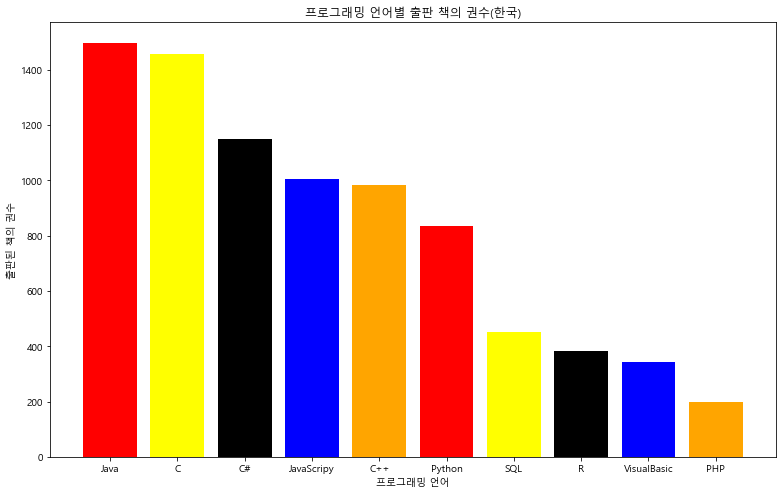

In [130]:
plt.figure(figsize=(13,8))
plt.bar(x, height = y, color = c)
plt.title("프로그래밍 언어별 출판 책의 권수(한국)")
plt.xlabel("프로그래밍 언어")
plt.ylabel("출판된 책의 권수")
plt.show()

## 4. 수집한 프로그래밍 별 출판 책의 권수 출판사 순위 구하기

In [131]:
Total_Data = pd.concat([Python,CLang,Java,Cpp,CShop,VisualBasic,JavaScript,SQL,PHP,R])
Total_Data.reset_index(drop=True, inplace=True)

In [132]:
Total_Data.head()

,title,author,price,pubdate,publisher,isbn
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,34000.0,20200805,한빛미디어,1162243074 9791162243077
1,Do it! 점프 투 파이썬,박응용,18800.0,20190620,이지스퍼블리싱,1163030910 9791163030911
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,18000.0,20190610,한빛미디어,1162241888 9791162241882
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,38000.0,20200715,책만,1189909170 9791189909178
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,32000.0,20200701,한빛미디어,1162243201 9791162243206


In [133]:
Total_Data.tail()

,title,author,price,pubdate,publisher,isbn
8297,3D 스튜디오 R3,안대식,20000.0,19940801,연암출판사,8985553836 9788985553834
8298,기업경영을 위한 LOTUS 1-2-3 R.2,김궁헌,12000.0,19880501,법문사,2602002380 2002602002381
8299,3D 스튜디오 R4,이용재,23000.0,19950601,성안당,8931542445 9788931542448
8300,LOTUS 1-2-3 R 2.2,김궁현,12000.0,19880501,법문사,8918126115 9788918126111
8301,AutoCAD 매뉴얼 (Release 2.6 -R 10 사용자를 위한),김영섭,18000.0,19900901,크라운출판사,667600027X 2006676000274


In [149]:
pub_rank = Total_Data["publisher"].value_counts()
pub_rank

한빛미디어       548
에이콘출판       408
정보문화사       324
영진닷컴        262
홍릉과학출판사     217
           ... 
오일러BOOKS      1
이모션미디어        1
퍼스트북          1
데브기어출판부       1
희성출판사         1
Name: publisher, Length: 582, dtype: int64

In [154]:
# 582개 중 상위 10% 출판사
pd.DataFrame(pub_rank).head(58)

,publisher
한빛미디어,548
에이콘출판,408
정보문화사,324
영진닷컴,262
홍릉과학출판사,217
Packt(GCOScience),180
성안당,175
대림,166
인포북,158
위키북스,152


C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


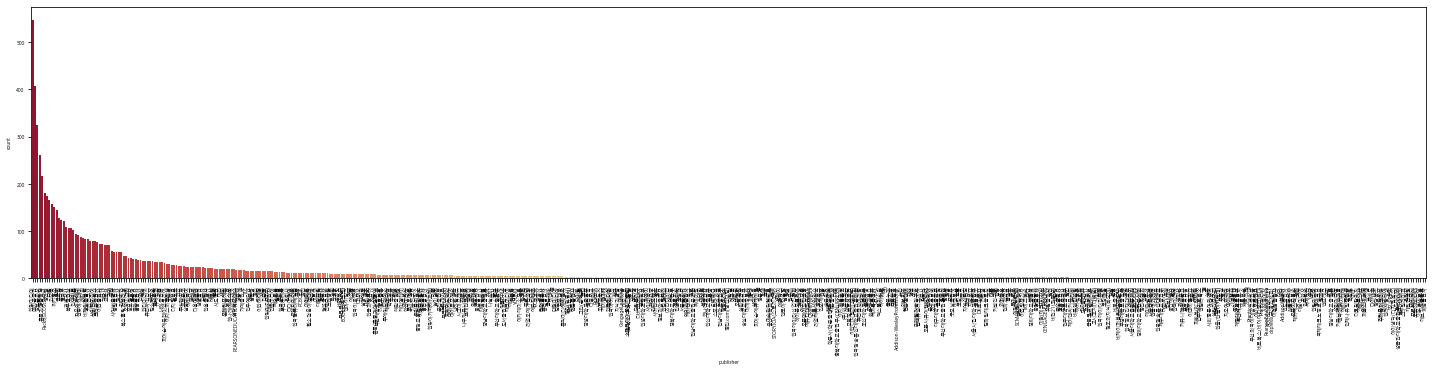

In [140]:
plt.figure(figsize=(25, 5))
sns.countplot(
    Total_Data["publisher"], 
    data=Total_Data, 
    palette="RdYlGn",
    order=Total_Data["publisher"].value_counts().index
)
plt.xticks(rotation=90)
plt.show()

## 5. 출판일(20~21년 vs 17~19년) 기준 비교
- 비교할 언어
    - Python : 올해 1위 언어
    - SQL : 작년 10위에서 8위로 올라간 언어
    - R : 작년대비 급락한 언어 (9 -> 14)

In [165]:
Python["pubYear"] = [eachAddress[:4] for eachAddress in Python["pubdate"]]

In [167]:
Python.head()

,title,author,price,pubdate,publisher,isbn,pubYear
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,34000.0,20200805,한빛미디어,1162243074 9791162243077,2020
1,Do it! 점프 투 파이썬,박응용,18800.0,20190620,이지스퍼블리싱,1163030910 9791163030911,2019
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,18000.0,20190610,한빛미디어,1162241888 9791162241882,2019
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,38000.0,20200715,책만,1189909170 9791189909178,2020
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,32000.0,20200701,한빛미디어,1162243201 9791162243206,2020


In [175]:
condition1 = (Python.pubYear == "2020") | (Python.pubYear == "2021")
Python_20_21 = Python.loc[condition1] # 필터링 된 row의 특정 컬럼만 추출
Python_20_21.reset_index(drop=True, inplace=True)
Python_20_21

,title,author,price,pubdate,publisher,isbn,pubYear
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,34000.0,20200805,한빛미디어,1162243074 9791162243077,2020
1,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,38000.0,20200715,책만,1189909170 9791189909178,2020
2,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,32000.0,20200701,한빛미디어,1162243201 9791162243206,2020
3,파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...,권철민,38000.0,20200207,위키북스,1158391927 9791158391928,2020
4,"파이썬을 이용한 비트코인 자동매매 (실시간 자동매매 시스템 개발 입문, 개정판)",유대표|조대표,27000.0,20210322,파이스탁,1196608814 9791196608811,2021
...,...,...,...,...,...,...,...
293,Python object(객체 분석 및 활용),강성모,15000.0,20200210,불잉걸,1196384215 9791196384210,2020
294,Hands-On Genetic Algorithms with Python,Eyal Wirsansky,23000.0,20200131,Packt(GCOScience),1838559183 9781838559182,2020
295,Mastering Python Networking Third Edition,Eric Chou,26000.0,20200130,Packt(GCOScience),1839218673 9781839218675,2020
296,Artificial Intelligence with Python Second Edi...,Alberto Artasanchez,31000.0,20200131,Packt(GCOScience),1839216077 9781839216077,2020


In [183]:
Python_20_21_div = pd.DataFrame(Python_20_21["pubdate"].value_counts())
Python_20_21_div

,pubdate
20201030,6
20210225,5
20200210,5
20200228,4
20200824,4
...,...
20201203,1
20200327,1
20210827,1
20210628,1


In [201]:
Python_20_21_div = Python_20_21_div.reset_index()
Python_20_21_div =Python_20_21_div.sort_values("index")
Python_20_21_div.reset_index(drop=True,inplace=True)
Python_20_21_div

,index,pubdate
0,20200102,1
1,20200103,1
2,20200106,1
3,20200108,3
4,20200110,1
...,...,...
182,20210930,3
183,20211006,1
184,20211010,1
185,20211021,1


In [197]:
condition2 = (Python.pubYear == "2017") | (Python.pubYear == "2018") | (Python.pubYear == "2019")
Python_17_19 = Python.loc[condition2] # 필터링 된 row의 특정 컬럼만 추출
Python_17_19.reset_index(drop=True, inplace=True)
Python_17_19

,title,author,price,pubdate,publisher,isbn,pubYear
0,Do it! 점프 투 파이썬,박응용,18800.0,20190620,이지스퍼블리싱,1163030910 9791163030911,2019
1,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,18000.0,20190610,한빛미디어,1162241888 9791162241882,2019
2,모두의 파이썬 (20일 만에 배우는 프로그래밍 기초),이승찬,12000.0,20181009,길벗,1160505853 9791160505856,2018
3,밑바닥부터 시작하는 딥러닝 (파이썬으로 익히는 딥러닝 이론과 구현),사이토 고키,24000.0,20170103,한빛미디어,8968484635 9788968484636,2017
4,모두의 데이터 분석 with 파이썬 (실생활 예제로 시작하는 데이터 분석 첫걸음),송석리|이현아,18000.0,20190425,길벗,1160507813 9791160507812,2019
...,...,...,...,...,...,...,...
402,Artificial Intelligence with Python,Prateek Joshi,26000.0,20170127,Packt(GCOScience),1786469677 9781786469670,2017
403,러플 튜토리얼로 배우는 Python(2판),이호준,4900.0,20170309,사도출판,1195995229 9791195995226,2017
404,러플 튜토리얼로 배우는 Python,이호준,4900.0,20170125,사도출판,1195995202 9791195995202,2017
405,"Objective C, Python를 만나다",박창진,5000.0,20170205,유페이퍼,1163043869 9791163043867,2017


In [198]:
Python_17_19_div = pd.DataFrame(Python_17_19["pubdate"].value_counts())
Python_17_19_div

,pubdate
20190131,8
20190228,6
20190430,5
20190102,5
20190329,4
...,...
20170615,1
20171030,1
20191115,1
20180102,1


In [199]:
Python_17_19_div = Python_17_19_div.reset_index()
Python_17_19_div =Python_17_19_div.sort_values("index")
Python_17_19_div.reset_index(drop=True,inplace=True)
Python_17_19_div

,index,pubdate
0,20170103,1
1,20170116,1
2,20170117,1
3,20170120,1
4,20170125,2
...,...,...
277,20191212,2
278,20191219,3
279,20191220,1
280,20191224,1


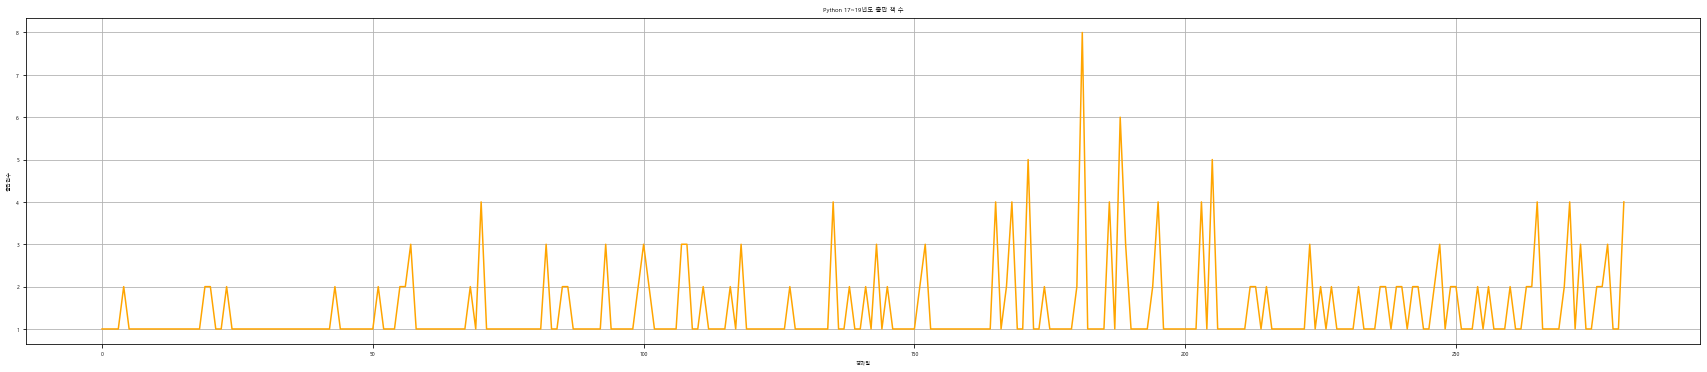

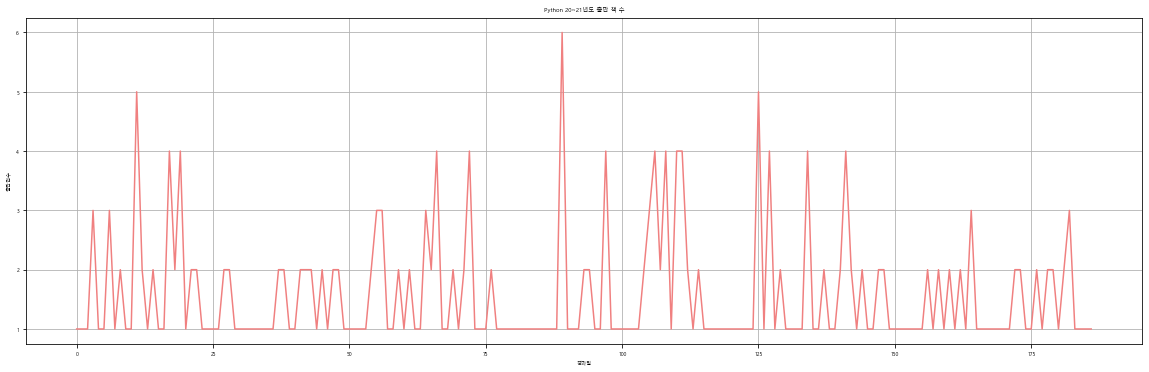

In [205]:
plt.figure(figsize= (30,6))
plt.title("Python 17~19년도 출판 책 수")
plt.xlabel("경과일")
plt.ylabel("출판권수")
plt.plot(Python_17_19_div["pubdate"],color = "orange")
plt.grid(True)
plt.show()

plt.figure(figsize= (20,6))
plt.title("Python 20~21년도 출판 책 수")
plt.xlabel("경과일")
plt.ylabel("출판권수")
plt.plot(Python_20_21_div["pubdate"],color = "LightCoral")
plt.grid(True)
plt.show()

파이썬은 꾸준히 순위가 상승하고있던 언어로 알고 있다 <br>
위에 나오는 그래프는 17~19년도 출판일별 파이썬 관련 책 출판 그래프이고 <br>
아래에 나오는 그래프는 20~21년도 출판일별 파이썬 관련 책 출판 그래프이다  
작년까지 3위였던 언어가 20~21년도에 들어서고 1위로 상승하면서 출판 책의 권수가 거의 매일 꾸준히 발매되는 한편  
17~19년도에는 초기에는 뜨문뜨문 책을 발매하고 점점 발매권수가 많아지고   
20~21년도가면서 꾸준히 발매되는 책의 권수도 늘고 책 발매 간격이 줄어 들고 있다는 것을 알 수 있다.
인기가 상승하면서 책도 많이 발매 되고 있다는 것을 알 수 있다.
